In [2]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

## Reading the data

In [5]:
# df=pd.read_csv("trainnew.csv",sep='\t',names=["toxic","comment_text"])

messages2=pd.read_csv("validationnew.csv")
df=pd.read_csv("trainnew.csv")

### Exploring the data 

In [6]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
df.toxic.unique() 

array([0, 1], dtype=int64)

In [8]:
df.isnull().sum() ## checking for null values 

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

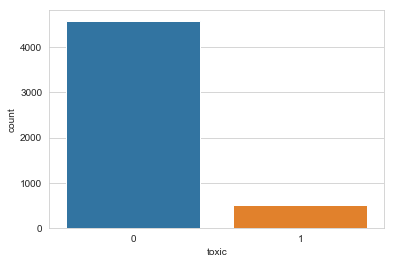

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='toxic',data=df)

### Preprocessing the data 

In [11]:
def preprocessing(text):
    """Changing text to lowercase ,removing extra spaces and cleaning the text.
    """
    text= text.lower().strip() 
    
    text=re.sub('[^a-zA-Z]',' ',text)
    
    text=re.sub(' +', ' ', text)
    return text

In [13]:
df['Comment']=df['comment_text'].apply(preprocessing)

In [14]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d aww he matches this background colour i m se...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i m really not trying to edit war it s...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i can t make any real suggestions on imp...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...


In [15]:
## Encoding 0 for ham and 1 for Spam

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
LE=LabelEncoder()
LE.fit(df["toxic"])

LabelEncoder()

In [18]:
df["toxic"]=LE.transform(df["toxic"])

In [19]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d aww he matches this background colour i m se...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i m really not trying to edit war it s...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i can t make any real suggestions on imp...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...
...,...,...,...,...,...,...,...,...,...
5094,0d829cce96095a23,Thanks a lot! As Italian (and Roman -)) it is ...,0,0,0,0,0,0,thanks a lot as italian and roman it is not al...
5095,0d835da3c6fd895d,"lying and deceit, harassment of others\n\nboll...",0,0,0,0,0,0,lying and deceit harassment of others bollocks...
5096,0d836500c0043535,"""\n\n Question \n\nNow we have the same Turkis...",0,0,0,0,0,0,question now we have the same turkish name at...
5097,0d843203e6ed37ed,You have just been reverted again. I have also...,0,0,0,0,0,0,you have just been reverted again i have also ...


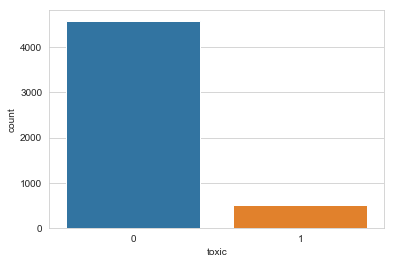

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='toxic',data=df)

### Converting comments to Embeddings

In [23]:
#  We could have used Tradition embeddings schmes like TFIDF or Bag of words but in that our model will only support only 1 language.
#  We are going to use multilingual model.Multilingual model is basically a pretrained deep neural network model which produces same vectors
#  for similar meaning of text in different languages. 
## We can use any multilingual sentence embedder like tensorfow's Unisversal Sentence Enbedder or ker.

In [24]:
# How a multilimgual model works?
# One common approach is to turn any incoming language into a language-agnostic vector in a space,
# where all languages for the same input would point to the same area. 
# That is to say, any incoming phrases with the same meaning would map to the same area in latent space.
# Multilingual Embeddings explained  -->https://www.youtube.com/watch?v=uP6k7ZTuaoI

In [25]:
# sentence_transformers provides multilingual sentence embedding models for the following languges:
# Arabic, Chinese, Dutch, English, French, German, Italian, Korean, Polish, Portuguese, Russian, Spanish, Turkish.
#  link for model https://github.com/UKPLab/sentence-transformers/blob/master/docs/pretrained-models/multilingual-models.md

In [28]:
pip install sentence-transformers

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement torch>=1.0.1 (from sentence-transformers) (from versions: 0.1.2, 0.1.2.post1, 0.1.2.post2)
ERROR: No matching distribution found for torch>=1.0.1 (from sentence-transformers)


In [ ]:
pip install torch===1.5.0 torchvision===0.6.0 -f https://download.pytorch.org/whl/torch_stable.html


In [26]:
from sentence_transformers import SentenceTransformer

ModuleNotFoundError: No module named 'sentence_transformers'

In [105]:
Encoder = SentenceTransformer('distiluse-base-multilingual-cased') # import the same model

In [195]:
embeddings=Encoder.encode(df["Message"]) # Encode text into vectors 

In [111]:
len(embeddings)

5572

In [126]:
embeddings[0]

array([ 7.10190088e-02, -3.65180410e-02, -5.85367263e-04, -9.86820832e-03,
        3.75818685e-02, -5.61738312e-02, -8.53606500e-03,  6.32724492e-03,
        3.41476239e-02,  2.84873117e-02, -1.44444872e-02,  3.87810692e-02,
        1.30251059e-02,  4.19219695e-02,  1.60155836e-02, -4.72075008e-02,
        4.20365110e-02,  1.96884423e-02, -1.92395411e-04, -4.39579375e-02,
       -3.83087657e-02, -5.19170891e-03, -7.14668632e-02, -2.63324752e-02,
        5.23170903e-02, -2.49114968e-02, -2.11825762e-02,  6.47861660e-02,
       -5.13798324e-03, -1.66555885e-02,  3.36918943e-02,  2.75700055e-02,
       -4.66383668e-03, -2.40476225e-02,  1.26287909e-02, -6.72872439e-02,
        2.87635140e-02,  3.97276878e-02, -4.53051440e-02,  2.89400108e-02,
       -3.44491117e-02,  1.78153627e-02,  5.15714064e-02,  3.22138406e-02,
        9.59002674e-02,  5.84095391e-03,  1.30946636e-02, -6.10704860e-03,
       -4.39988077e-02, -7.63230026e-03,  3.50430720e-02,  3.28807090e-03,
        9.53786727e-03,  

In [125]:
print(embeddings[0].shape)

(512,)


## Preparing the train and test data

In [113]:
x=embeddings
y=df["Label"].values

In [99]:
from sklearn.model_selection import train_test_split

In [127]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=42)

In [164]:
print("Training set of X and y-->",len(X_train),len(y_train))
print("Test set of X and y-->",len(X_test),len(y_test))

Training set of X and y--> 4457 4457
Test set of X and y--> 1115 1115


## Apply Classification algorithm

In [148]:
from sklearn.svm import SVC

In [165]:
classifier=SVC(kernel='linear')

In [166]:
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [167]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [168]:
y_pred_svc=classifier.predict(X_test)

In [169]:
accuracy_score(y_test,y_pred_svc)

0.9865470852017937

### When your dataset is imbalanaced,Confusion Matrix gives us more clearity than the accuracy matrix 

In [ ]:
from sklearn.metrics import confusion_matrix

In [150]:
cm=confusion_matrix(y_test,y_pred_svc)

array([[961,   5],
       [ 10, 139]], dtype=int64)

## Visualize the Confusion matrix 

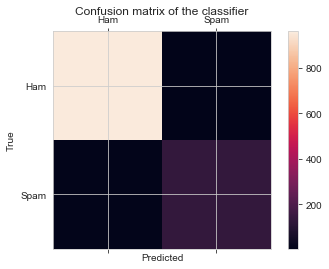

[[961   5]
 [ 10 139]]


In [157]:
labels = ['Ham', 'Spam']
cm=confusion_matrix(y_test,y_pred_svc)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(cm)

## Predicting for new input 

In [171]:
# classifier.predict(['hey'])

In [188]:
# We have trained our model 0 for ham and 1 for Spam
def prediction(predict_text):
    predict_data=Encoder.encode([predict_text])
    if classifier.predict(predict_data)[0]>0:
        return "Spam"
    else:
        return "Ham"

In [205]:
prediction("Per favore, inoltrami che la presentazione sarà fine della giornata")

'Ham'

In [207]:
# sample inputs:
# Spam:
# English -->Click here to get the prize money.
# Arabic-->انقر هنا للحصول على أموال الجائزة.
# German-->Klicken Sie hier, um das Preisgeld zu erhalten.
# Ham :
# English-->Please forward me that presentation be end of the day
# French-->Veuillez me faire parvenir cette présentation en fin de journée
# Italian->Per favore, inoltrami che la presentazione sarà fine della giornata